<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Николай! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным мометнам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<font color='purple'><b>Комментарий студента: Привет! поехали :) </b></font>

<font color='blue' size=3><b>Комментарий ревьюера 2</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</font>

## Проект спринт 12
**Название проекта**:  
Цифра     
_____
**Описание исследования**:  
Построение модели предсказания коэффициента восстановления золота из золотосодержащей руды на основании данных с параметрами добычи и очистки.  
_____
**Цель исследования**:  
Оптимизация производства, чтобы не запускать предприятие с убыточными характеристиками.
_____
**План исследования.**  
[Шаг 1. Загрузка и подготовка данных](#step1)  
[Шаг 2. Анализ данных](#step2)  
[Шаг 3. Построение модели](#step3)  
[Шаг 4. Результаты и выводы](#step4)  
_____
**Исходные данные.**
Исходные файлы, содержащие данные геологоразведки трёх регионов:  
- [gold_recovery_full_new.csv](gold_recovery_full_new.csv) - полные исходные данные
- [gold_recovery_test_new.csv](gold_recovery_test_new.csv) - валидационная выборка
- [gold_recovery_train_new.csv](gold_recovery_train_new.csv) - обучающая выборка   


<a id='step1'></a>
## Шаг 1. Загрузка и подготовка данных

In [1]:
# загружаем нужные библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error as mae

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV

RANDOM_STATE = 54321
CROSS_VALS = 3

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>Здорово, что все импорты находятся в одной ячейке.<br>
Если хочешь сделать ещё лучше, соблюдай стандарт PEP-8, разбей импорты на функциональные группы, раздели группы пустой строкой. Можно в каждой группе отсортировать импорты в алфавитном порядке.<br>
Ссылка для ознакомления: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html
</font>  
<font color='purple'><b>Комментарий студента: немного причесал</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

### Откроем файлы и изучим их

In [2]:
def load_file(file_name):
    try:
        df = pd.read_csv(file_name)
        print('Загрузили файл локально')
    except:
        file_path = 'https://code.s3.yandex.net/datasets/' + file_name
        print('локально не удалось, загружаем из интернета')
        df = pd.read_csv(file_path)
    return df

In [3]:
full = load_file('gold_recovery_full_new.csv')
test = load_file('gold_recovery_test_new.csv')
train = load_file('gold_recovery_train_new.csv')
print(full.shape)
print(train.shape)
print(test.shape)

локально не удалось, загружаем из интернета
локально не удалось, загружаем из интернета
локально не удалось, загружаем из интернета
(19439, 87)
(14149, 87)
(5290, 53)


в тестовом датасете меньше фичей, чем в полной и обучающих выборках

In [4]:
display(train.sample(2))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
13583,2018-07-16 03:59:59,4.948414,10.085480,6.929543,43.963952,64.108570,10.851600,2.60540,6.842789,2.171466,...,17.996031,-500.586618,16.016221,-500.406097,12.009039,-500.125193,11.010146,-500.208987,13.037100,-499.525758
9740,2017-08-30 18:59:59,3.163003,12.023026,10.049244,45.842241,67.348663,5.910194,3.92183,13.267873,2.785925,...,13.956583,-499.815075,11.091240,-399.583041,13.992722,-500.253073,10.969570,-500.115417,15.001014,-500.188188


In [5]:
print(train.columns)

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

### Проверим, что эффективность обогащения рассчитана правильно

In [6]:
# C (F - T)
# F (C - T)
# C - Au after
# F - Au before
# T - Au in tails
train['rougher.output.recovery_calc'] =\
        100.0 * train['rougher.output.concentrate_au'] * \
        (train['rougher.input.feed_au'] - train['rougher.output.tail_au'])\
        / (train['rougher.input.feed_au'] *\
        (train['rougher.output.concentrate_au'] - train['rougher.output.tail_au']))
m = mae(train['rougher.output.recovery'], train['rougher.output.recovery_calc'])
print(m)

1.1498046842860452e-14


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Расчёт верный!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Старайся разбивать код на строчки так, что бы всё было перед глазами. По стандарту строка кода не должна превышать 79 символов.</font>  
<font color='purple'><b>Комментарий студента: привел к PEP8</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

на ~~тестовой~~обучающей выборке разница MAE между рассчитанным уровнем обогащения и из данных ничтожно мал, можно рассчитывать на исходные данные

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Это обучающая выборка.</font>  
<font color='purple'><b>Комментарий студента: поправлено</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

### Проанализируем признаки, недоступные в тестовой выборке

In [7]:
test_columns = set(test.columns)
train_columns = set(train.columns)
diff = list(sorted(train_columns - test_columns))
diff

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.recovery_calc',
 'rougher.output.tail_ag',
 'rougher.out

In [8]:
display(train[diff].info())
display(train[diff].sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 35 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_au                         14149 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_au                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

,final.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_ag,final.output.tail_au,final.output.tail_pb,final.output.tail_sol,primary_cleaner.output.concentrate_ag,...,rougher.output.recovery,rougher.output.recovery_calc,rougher.output.tail_ag,rougher.output.tail_au,rougher.output.tail_pb,rougher.output.tail_sol,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol
7682,6.789038,39.801848,12.299360,11.577825,54.253875,10.698025,5.960685,4.469677,9.502451,10.063156,...,80.386895,80.386895,7.010074,3.726736,1.357886,12.652253,13.365063,13.505407,6.569868,9.058810
5247,5.746856,43.701599,10.156792,16.185607,70.287850,11.023070,3.619854,3.986921,9.772553,10.479384,...,88.568650,88.568650,5.869945,1.944401,0.538891,13.535204,15.574392,8.202087,6.843706,10.325680
14078,4.425362,44.456875,10.808634,7.657809,75.255392,10.897681,1.848232,3.139459,9.701046,9.084452,...,94.219142,94.219142,3.737826,0.558634,0.548274,18.386867,18.148449,3.836819,10.782714,2.768565
5132,4.699103,46.537084,8.919405,14.102601,75.026908,10.886662,2.859155,2.668254,9.984545,8.911866,...,88.376768,88.376768,6.360484,1.786153,0.375460,18.220269,17.135969,2.983614,3.671232,9.600847
3981,6.148118,43.734517,8.256247,9.710687,70.373378,10.279219,3.694385,2.932942,9.802285,9.247253,...,89.224585,89.224585,5.349165,2.111581,0.671743,13.910707,11.900796,5.354432,3.254862,9.999486
14136,3.540800,45.323979,12.423927,6.702631,70.477689,8.866079,1.439220,2.816357,9.838458,7.404078,...,91.245717,91.245717,4.116838,0.513143,0.466360,17.189575,17.243332,3.721288,12.286579,NaN
11241,4.499880,45.656652,11.134300,8.469435,71.634437,9.096745,2.229945,2.041674,8.197805,6.903647,...,91.372073,91.372073,4.022862,0.920572,0.738608,19.010859,17.168205,4.493847,9.939966,NaN
370,9.274084,34.656027,11.763067,4.287754,56.378914,10.253117,2.899491,0.986475,16.230659,11.609533,...,62.814416,62.814416,6.513299,2.689297,0.848555,17.484193,11.923688,4.803149,4.696675,7.271287
12321,4.088412,46.926178,9.113297,7.125671,65.847157,8.510407,2.759046,2.007849,10.602290,5.844132,...,78.443569,78.443569,5.506580,2.265765,0.877921,20.290201,16.868989,4.938767,9.077587,0.303310
12385,4.868042,44.753467,9.537963,7.711467,61.174012,9.265524,3.289320,2.502521,9.646116,8.406175,...,77.148252,77.148252,5.589803,2.596875,1.011541,17.836937,16.934036,5.613873,8.966290,1.046793


в тестовой выборке отсутствуют почти все данные о выходе и хвостах на всех этапах процесса очистки (кроме выхода из вторичной очистки, которая есть)  
также отсутствуют некоторые расчетные данные: `rougher.calculation.au_pb_ratio`, `rougher.calculation.floatbank10_sulfate_to_au_feed`, `rougher.calculation.floatbank11_sulfate_to_au_feed`, `rougher.calculation.sulfate_to_au_concentrate`

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Верно!</font>

### проведем предобработку данных

In [9]:
# уберем из train поля, которых нет в test (кроме целевых переменных)
target_columns = ['rougher.output.recovery', 'final.output.recovery']
target_date_columns = ['rougher.output.recovery', 'final.output.recovery', 'date']
diff = set(diff)
diff = list(diff - set(target_columns))

train.drop(diff, axis='columns', inplace=True)

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Данные для моделей можно подготовить позже, у нас впереди ещё анализ данных.</font>  
<font color='purple'><b>Комментарий студента: сделал здесь, чтобы уже не мешались лишние</b></font>

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14149 non-null  object 
 1   final.output.recovery                       14149 non-null  float64
 2   primary_cleaner.input.sulfate               14129 non-null  float64
 3   primary_cleaner.input.depressant            14117 non-null  float64
 4   primary_cleaner.input.feed_size             14149 non-null  float64
 5   primary_cleaner.input.xanthate              14049 non-null  float64
 6   primary_cleaner.state.floatbank8_a_air      14145 non-null  float64
 7   primary_cleaner.state.floatbank8_a_level    14148 non-null  float64
 8   primary_cleaner.state.floatbank8_b_air      14145 non-null  float64
 9   primary_cleaner.state.floatbank8_b_level    14148 non-null  float64
 10  primary_cl

In [11]:
train.sample(10)

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
4137,2016-08-07 06:59:59,39.674920,45.901464,3.984041,7.400000,0.470555,1601.222664,-499.919463,1598.873742,-499.544516,...,19.963728,-400.774785,17.942925,-399.282014,8.848033,-400.406558,9.924120,-399.577876,26.017776,-500.229054
5725,2017-02-21 13:59:59,72.872953,167.394822,8.992674,7.110000,0.685789,1701.080813,-500.025727,1697.623365,-500.277800,...,24.987560,-398.529834,22.999856,-399.323207,22.979159,-449.899679,20.012219,-449.999751,25.008968,-499.781433
5223,2017-01-30 07:59:59,69.847099,166.865685,11.033913,7.130000,1.583061,1596.902912,-499.434294,1600.415869,-501.197852,...,22.991090,-466.537562,21.041118,-456.683110,23.015608,-499.801202,19.992657,-500.358735,25.009601,-600.244975
3585,2016-07-14 12:59:59,66.225305,88.797283,3.732638,7.670000,1.055493,1599.006030,-501.944217,1599.927192,-497.735397,...,15.016167,-400.605284,4.999537,-400.688062,12.182038,-333.799829,4.938299,-400.186760,24.969973,-449.190150
12236,2018-05-13 11:59:59,68.662470,192.836601,8.273213,7.543334,1.397875,1704.565509,-500.808767,1721.883193,-500.030199,...,30.006467,-498.882411,19.936982,-499.459783,24.995314,-498.946953,22.973964,-499.796921,25.002676,-499.928729
6324,2017-03-20 11:59:59,59.200334,144.329153,6.191749,7.320000,NaN,1700.215274,-499.519492,1700.260788,-500.005959,...,24.939817,-400.786416,23.034992,-400.219305,24.933307,-449.720941,19.962166,-449.582354,24.996243,-499.679720
2088,2016-05-04 20:59:59,65.011875,143.739520,10.582341,6.940000,1.004138,1497.763707,-501.726228,1497.289529,-499.566842,...,14.024087,-500.288455,12.095587,-500.150923,10.967235,-501.184050,9.968142,-500.730876,15.988804,-501.453332
13449,2018-07-10 06:59:59,79.009676,127.572075,6.071481,7.320000,1.083242,1451.424500,-499.826863,1452.880725,-499.565249,...,24.959446,-499.512637,20.104600,-496.404575,18.027961,-501.343706,12.963733,-500.010472,12.996447,-499.456549
2639,2016-05-29 19:59:59,66.585894,115.238732,10.032100,8.280000,1.215666,1399.485851,-500.002467,1399.985522,-499.763058,...,9.998440,-499.445413,7.939763,-500.799170,8.090727,-499.984957,6.050207,-500.821172,18.003517,-502.113618
5152,2017-01-26 22:59:59,74.124390,110.853807,10.086007,7.510000,0.714428,1599.242652,-499.846033,1603.012376,-499.296736,...,21.015920,-501.138428,20.947659,-500.073658,22.985331,-500.105178,19.992765,-499.928616,25.014523,-599.662657


In [12]:
train['date'] = pd.to_datetime(train.date, format='%Y-%m-%d %H:%M:%S')
test['date'] = pd.to_datetime(test.date, format='%Y-%m-%d %H:%M:%S')
full['date'] = pd.to_datetime(full.date, format='%Y-%m-%d %H:%M:%S')

In [13]:
#train.dropna(inplace=True)
train.fillna(method='ffill', inplace=True)

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Теряем данные.\
В условиях есть указание, что соседние данные похожи. Можно протестировать работу моделей с заполнением по этому условию.</font>  
<font color='purple'><b>Комментарий студента: поправлено (аналогично тестовой выборке)</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Пропуски заполнены согласно условию задачи!</font>

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        14149 non-null  datetime64[ns]
 1   final.output.recovery                       14149 non-null  float64       
 2   primary_cleaner.input.sulfate               14149 non-null  float64       
 3   primary_cleaner.input.depressant            14149 non-null  float64       
 4   primary_cleaner.input.feed_size             14149 non-null  float64       
 5   primary_cleaner.input.xanthate              14149 non-null  float64       
 6   primary_cleaner.state.floatbank8_a_air      14149 non-null  float64       
 7   primary_cleaner.state.floatbank8_a_level    14149 non-null  float64       
 8   primary_cleaner.state.floatbank8_b_air      14149 non-null  float64       
 9   primar

### построим распределения переменных в обучающих и тестовых выборках на одних графиках

date


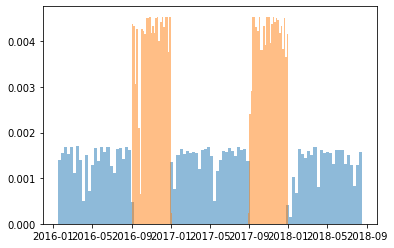

final.output.recovery


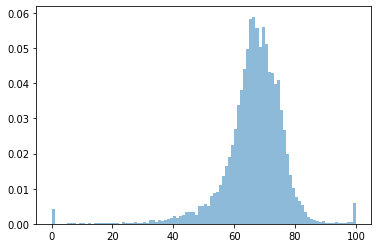

primary_cleaner.input.sulfate


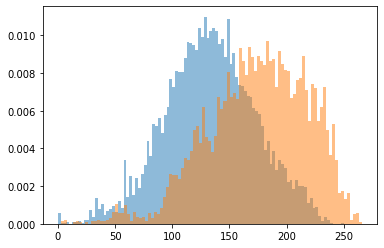

primary_cleaner.input.depressant


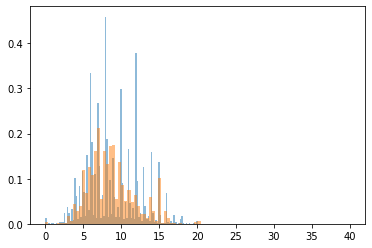

primary_cleaner.input.feed_size


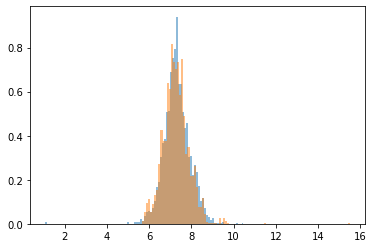

primary_cleaner.input.xanthate


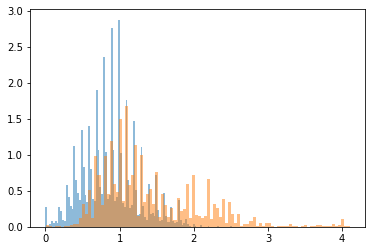

primary_cleaner.state.floatbank8_a_air


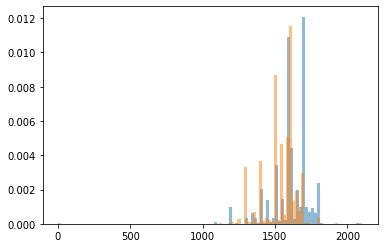

primary_cleaner.state.floatbank8_a_level


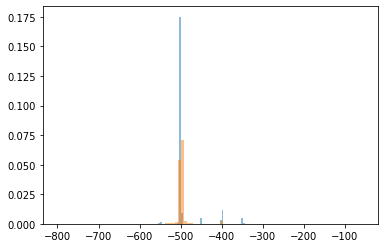

primary_cleaner.state.floatbank8_b_air


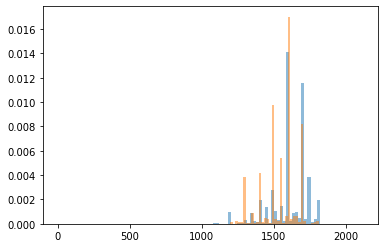

primary_cleaner.state.floatbank8_b_level


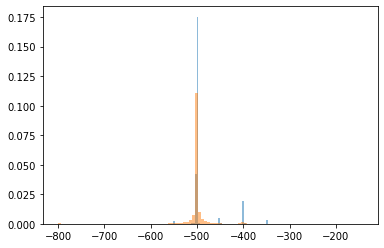

primary_cleaner.state.floatbank8_c_air


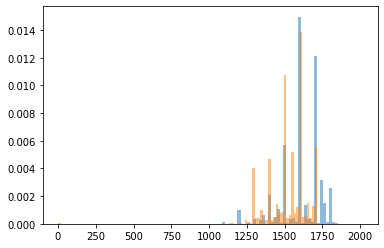

primary_cleaner.state.floatbank8_c_level


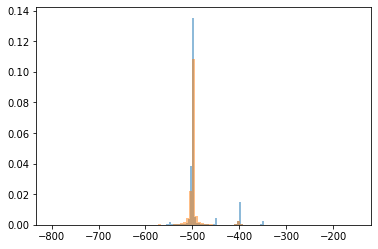

primary_cleaner.state.floatbank8_d_air


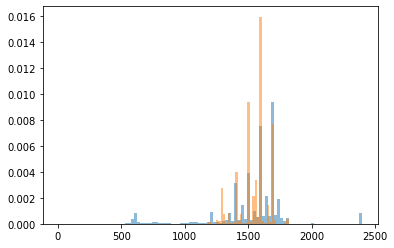

primary_cleaner.state.floatbank8_d_level


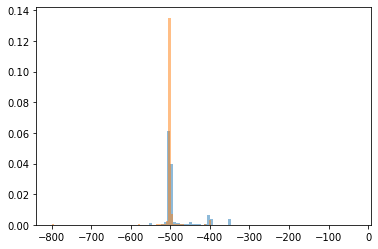

rougher.input.feed_ag


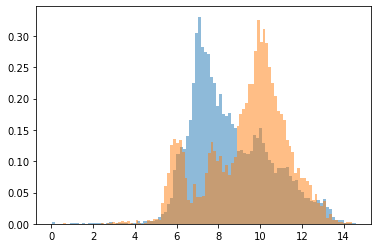

rougher.input.feed_pb


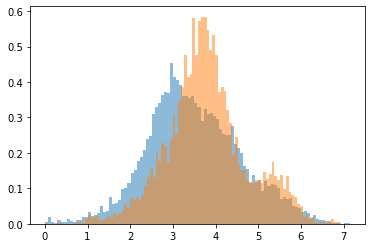

rougher.input.feed_rate


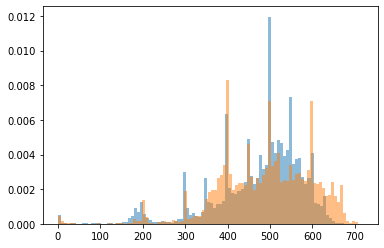

rougher.input.feed_size


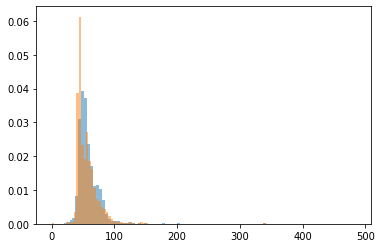

rougher.input.feed_sol


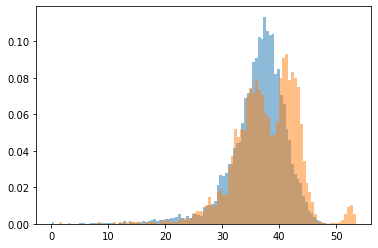

rougher.input.feed_au


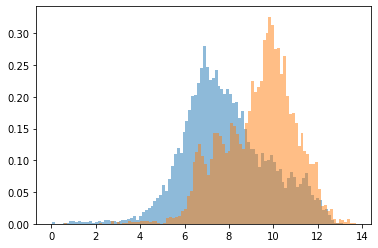

rougher.input.floatbank10_sulfate


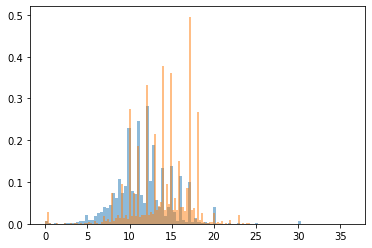

rougher.input.floatbank10_xanthate


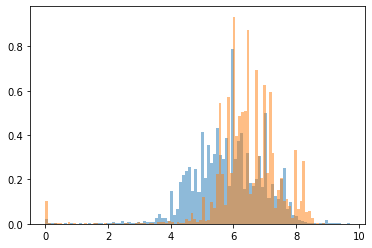

rougher.input.floatbank11_sulfate


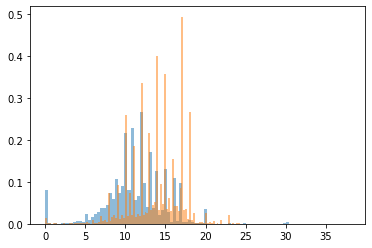

rougher.input.floatbank11_xanthate


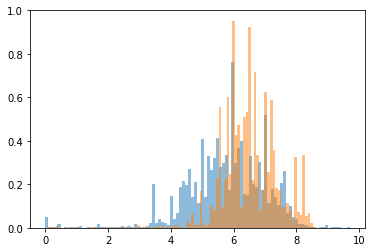

rougher.output.recovery


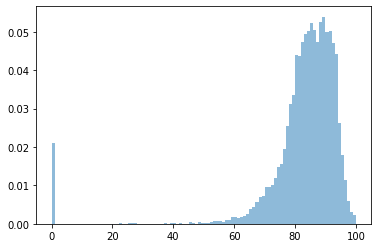

rougher.state.floatbank10_a_air


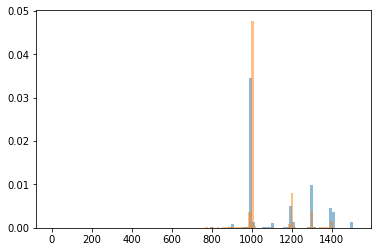

rougher.state.floatbank10_a_level


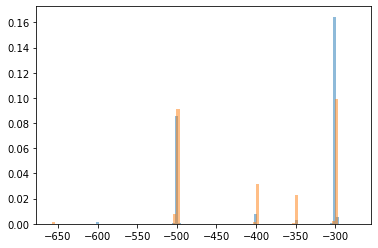

rougher.state.floatbank10_b_air


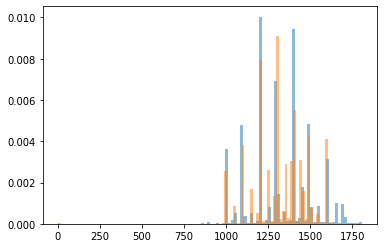

rougher.state.floatbank10_b_level


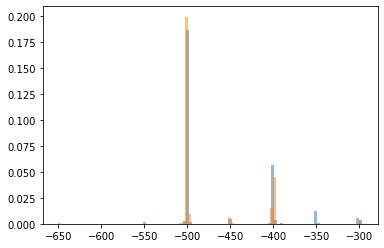

rougher.state.floatbank10_c_air


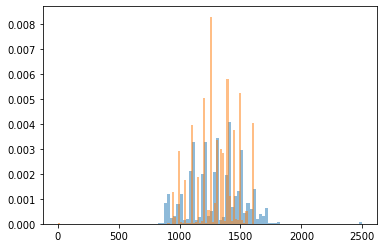

rougher.state.floatbank10_c_level


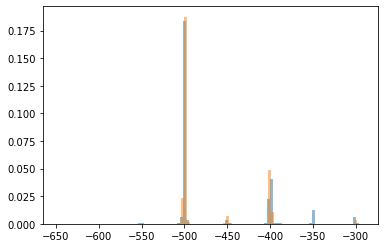

rougher.state.floatbank10_d_air


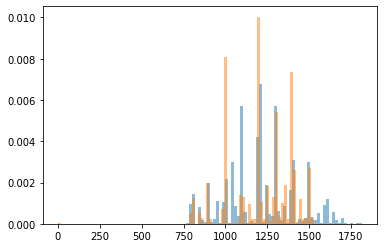

rougher.state.floatbank10_d_level


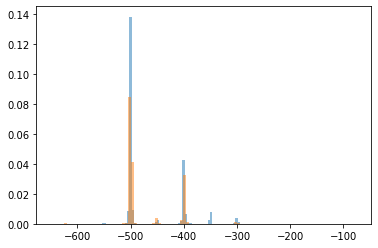

rougher.state.floatbank10_e_air


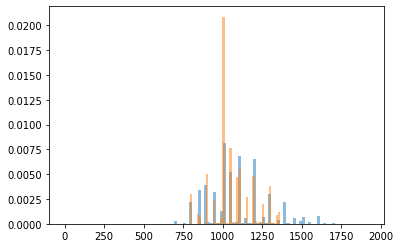

rougher.state.floatbank10_e_level


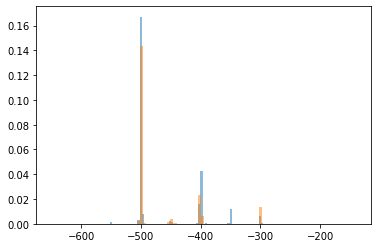

rougher.state.floatbank10_f_air


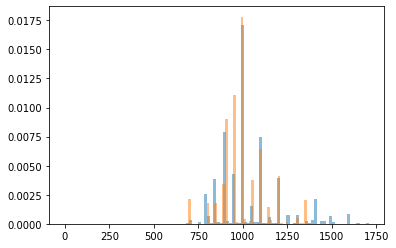

rougher.state.floatbank10_f_level


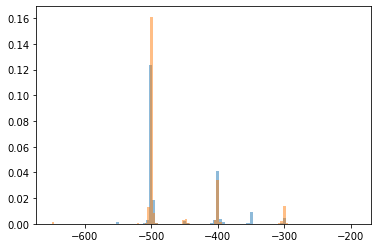

secondary_cleaner.state.floatbank2_a_air


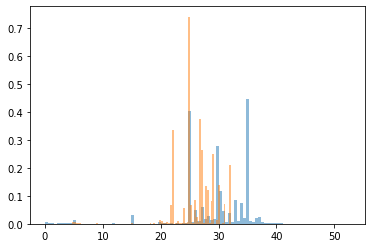

secondary_cleaner.state.floatbank2_a_level


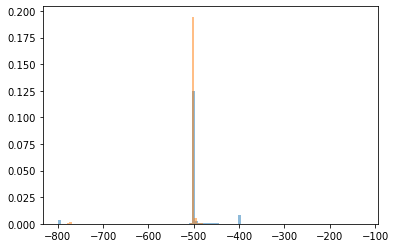

secondary_cleaner.state.floatbank2_b_air


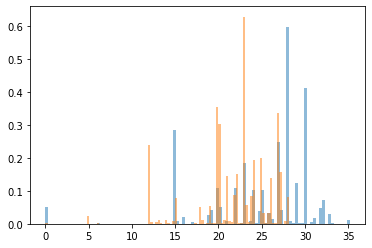

secondary_cleaner.state.floatbank2_b_level


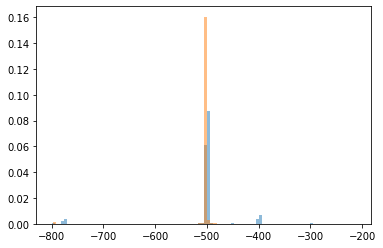

secondary_cleaner.state.floatbank3_a_air


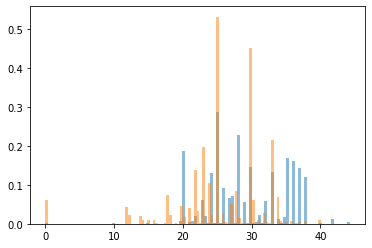

secondary_cleaner.state.floatbank3_a_level


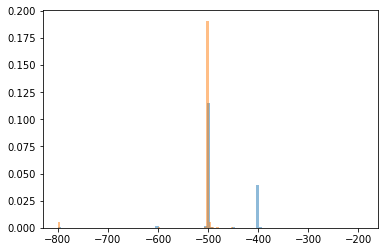

secondary_cleaner.state.floatbank3_b_air


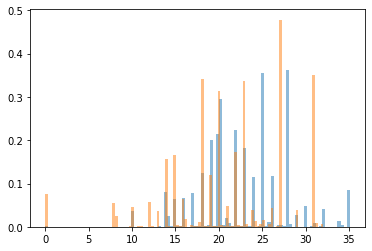

secondary_cleaner.state.floatbank3_b_level


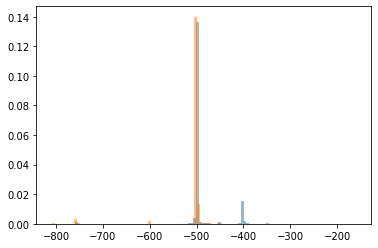

secondary_cleaner.state.floatbank4_a_air


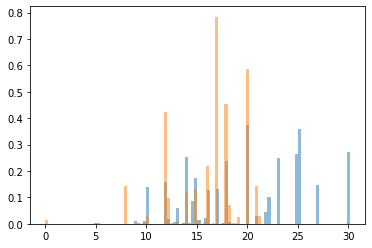

secondary_cleaner.state.floatbank4_a_level


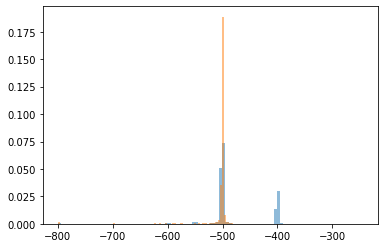

secondary_cleaner.state.floatbank4_b_air


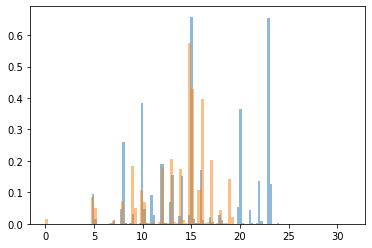

secondary_cleaner.state.floatbank4_b_level


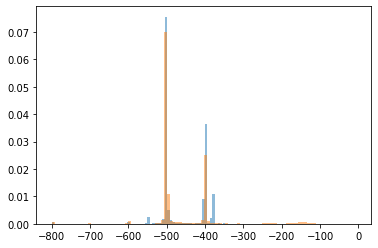

secondary_cleaner.state.floatbank5_a_air


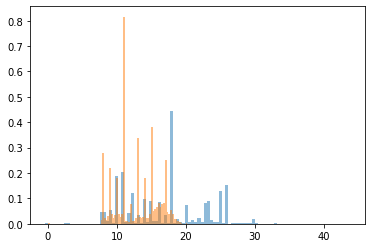

secondary_cleaner.state.floatbank5_a_level


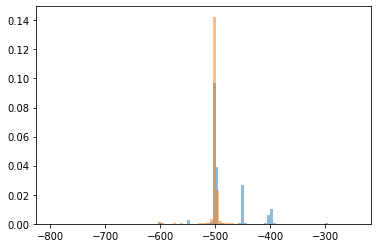

secondary_cleaner.state.floatbank5_b_air


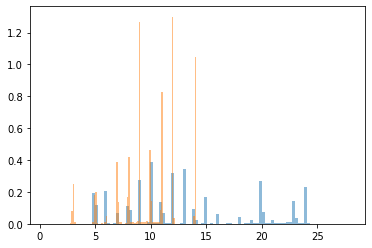

secondary_cleaner.state.floatbank5_b_level


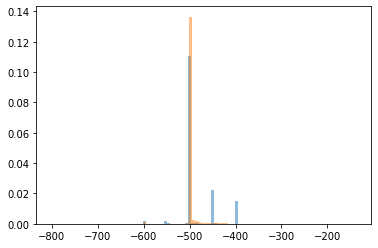

secondary_cleaner.state.floatbank6_a_air


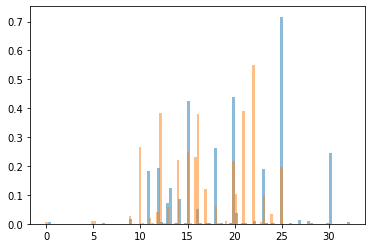

secondary_cleaner.state.floatbank6_a_level


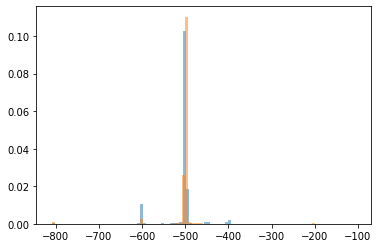

In [15]:
bins = 100
for i in train.columns:
    print(i)
    plt.hist(train[i], bins=bins, alpha=0.5, density=True)
    if i in test.columns:
        plt.hist(test[i], bins=bins, alpha=0.5, density=True)
    plt.show()

Основные выводы и расхождения:  
- для тестовой выборки взяли выбранные даты  
- в тестовой выборке распределения параметров не полностью повторяют распределение в обучающей выборке; как минимум, все данные кроме дат необходимо нормализовать перед обучением модели

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Выборки разного размера - гистограммы необходимо нормализовать.</font>  
<font color='purple'><b>Комментарий студента: добавил `density=True`; в основном стало лучше видно, что в целом данные похожи, но есть и выбросы</b></font>

<a id='step2'></a>
## Шаг 2. Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [16]:
full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [17]:
metals = ['au', 'ag', 'pb']
prefix_states = ['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']
axis_states = ['в исходном сырье', 'после флотации', 'после первичной очистки', 'в финальном концентрате']

AU


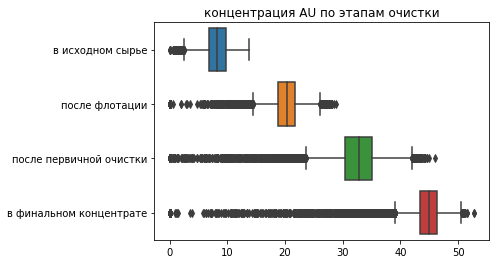

AG


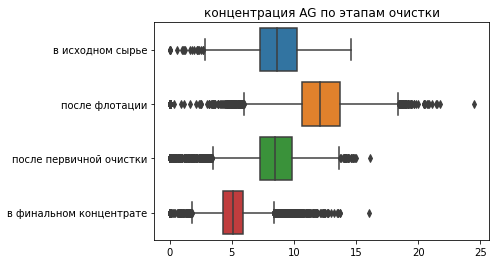

PB


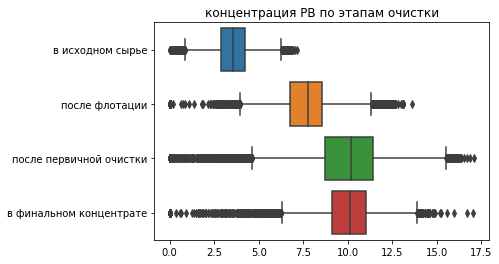

In [18]:
for metal in metals:
    p = []
    for i in range(len(prefix_states)):
        p.append(prefix_states[i] + metal)
    print(metal.upper())
    fig, ax = plt.subplots()
    _ = sns.boxplot(data=full[p], orient='h')
    ax.set_yticklabels(axis_states)
    plt.title(label=f'концентрация {metal.upper()} по этапам очистки')
    plt.show()

Концентрация золота в ходе процесса очистки стабильно растет, начиная с 10% до 50%  
Концентрация серебра вырастает после флотации с 9% до 13%, затем падает до 5% после финального этапа очистки  
Концентрпция свинца растет с 3% до 10% после первичной очистки и остается на этом уровне в финальном концентрате

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Всё верно!</font>

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

In [19]:
train['rougher.input.feed_size'].describe()

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [20]:
test['rougher.input.feed_size'].describe()

count    5289.000000
mean       55.951097
std        19.081758
min         0.046369
25%        43.906347
50%        50.841029
75%        62.431047
max       392.494040
Name: rougher.input.feed_size, dtype: float64

<AxesSubplot:>

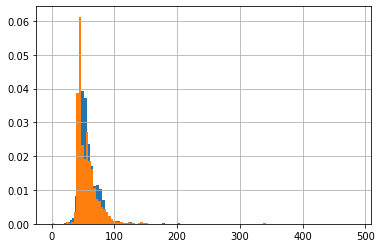

In [21]:
train['rougher.input.feed_size'].hist(bins=100, density=True)
test['rougher.input.feed_size'].hist(bins=100, density=True)

распределение размера гранул не являются одинаковыми на обучающей и тестовой выборках, но нормализации должно быть достаточно для обеспечения качественных предсказаний

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='darkorange'> В данном случае нужно использовать параметр "density=True" в методе ".hist()". Так бы нам удалось перейти от количества к доле.</font>  
<font color='purple'><b>Комментарий студента: да, добавил `density=True` и стало еще лучше видно</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

### Исследуем суммарную концентрацию всех веществ на разных стадиях

In [22]:
rougher_feed = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']
rougher_au = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']
final_au = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']

full['rougher_feed'] = full[rougher_feed].sum(axis=1)
full['rougher_au'] = full[rougher_au].sum(axis=1)
full['final_au'] = full[final_au].sum(axis=1)

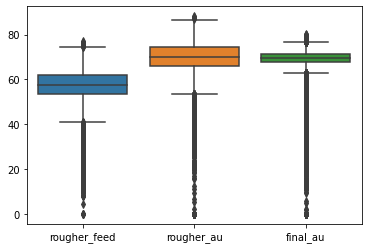

In [23]:
_ = sns.boxplot(data=full[['rougher_feed', 'rougher_au', 'final_au']])

после первичной очистки концентрация металлов в среднем повышается с 60% до 70%, при этом разброс значений достаточно велик  
после финальной очистки концентрация в среднем уже не повышается, но значительно снижается разброс цифр

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Обрати внимание на нулевые и около нулевые значения концентраций. Это явная аномалия. Скорее всего это связано со сбоем измерительного оборудования. Такие наблюдения нужно удалить из **обучающих** данных.\
Модель планируется использовать для подбора параметров оборудования, поэтому примеры со сбоями не интересные для моделирования.</font>  
<font color='purple'><b>Комментарий студента: дополнено - ниже</b></font>

Обратим внимание на выбросы суммарных значений концентраций, близких к нулю. Допустим, они вызваны неисправностью измерительного оборудования и удалим это выбросы из обучающей выборки.  
Заметим, что в тестовой выборке, на которой в итоге будем проверять модель, имеются только поля `rougher.input.feed_*`; их и необходимо проверить в обучающей выборке

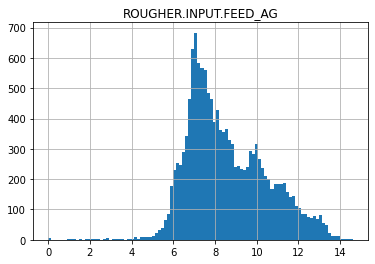

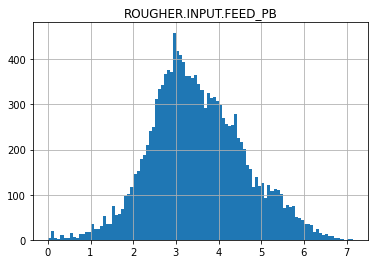

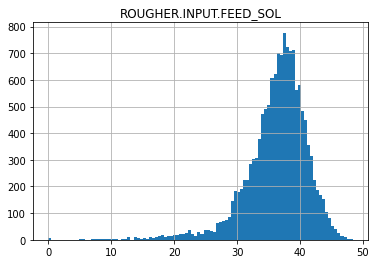

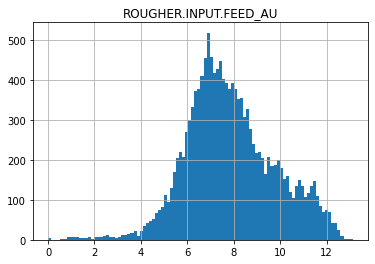

In [24]:
for metal in rougher_feed:
    plt.title(label=metal.upper())
    train[metal].hist(bins=100)
    plt.show()

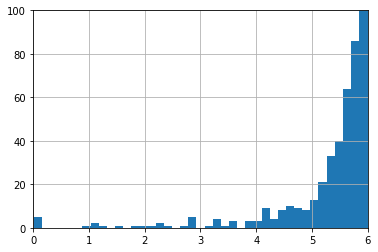

In [25]:
train['rougher.input.feed_ag'].hist(bins=100)
plt.xlim(0, 6)
plt.ylim(0, 100)
plt.show()

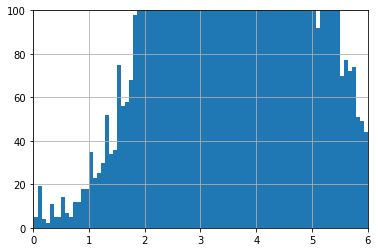

In [26]:
train['rougher.input.feed_pb'].hist(bins=100)
plt.xlim(0, 6)
plt.ylim(0, 100)
plt.show()

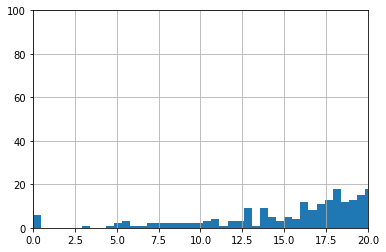

In [27]:
train['rougher.input.feed_sol'].hist(bins=100)
plt.xlim(0, 20)
plt.ylim(0, 100)
plt.show()

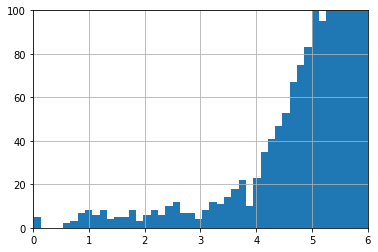

In [28]:
train['rougher.input.feed_au'].hist(bins=100)
plt.xlim(0, 6)
plt.ylim(0, 100)
plt.show()

Будем считать аномальными следующие значения:  
- `rougher.input.feed_ag` : < 1
- `rougher.input.feed_pb` : никаких
- `rougher.input.feed_sol` < 2.5
- `rougher.input.feed_au` : < 0.5  

уберем из обучающей выборки такие аномальные значения

In [29]:
train = train[
    (train['rougher.input.feed_ag'] > 1.0) & 
    (train['rougher.input.feed_sol'] > 2.5) & 
    (train['rougher.input.feed_au'] > 0.5)
    ]

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'> Нулевые значения суммарных концентраций есть и на других стадиях.\
Здесь нам понадобятся либо полные данные из train, Или нужно фильтровать full и чистить train с привязкой к дате наблюдения.</font>

<a id='step3'></a>
## Шаг 3. Построение модели

In [30]:
test.fillna(method='ffill', inplace=True)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Пропуски заполнены согласно условию задачи!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Лучше использовать `ffill`, при работе будут заполнять пердыдущим значением, а не будущим.</font>  
<font color='purple'><b>Комментарий студента: поправлено</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

функции для вычисления итоговой sMAPE

In [31]:
#def sMAPE(y_true, y_pred):
#    y_true = list(y_true)
#    y_pred = list(y_pred)
#    sum_ = 0.0
#    n = len(y_true)
#    for i in range(n):
#        nom = abs(y_true[i] - y_pred[i])
#        den = abs(y_true[i]) + abs(y_pred[i])
#        dt = nom / den
#        sum_ += 2.0 * dt
#    return 100.0 * sum_ / n

def sMAPE(y_true, y_pred):
    return 200.0 * np.mean (np.abs(y_true-y_pred) / (np.abs(y_true) + np.abs(y_pred)))

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> `sMAPE` расчитана верно.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Цикл сильно тормозит вычисления. Для суммы в Pyhton есть отличные методы!</font>  
<font color='purple'><b>Комментарий студента: переписал функцию, стары код закомментировал</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Супер! 👍</font>

In [32]:
sMAPE_scorer = make_scorer(sMAPE, greater_is_better=False)

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️ <br>
<font color='green'>Верно, что не забываешь указать greater_is_better=False, Это пригодится для SearchCV. SMAPE — ошибка, её минимизируем.</font>

In [33]:
def sMAPEtotal_(sMAPErougher, sMAPEfinal):
    return 0.25 * sMAPErougher + 0.75 * sMAPEfinal

def sMAPEtotal(rougher_true, rougher_pred, final_true, final_pred):
    return sMAPEtotal_(sMAPE(rougher_true, rougher_pred), sMAPE(final_true, final_pred))

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

In [34]:
features = train.drop(columns=target_date_columns)
target = train[target_columns]

In [35]:
features_test = pd.merge(test, full[target_date_columns], on='date')
target_test = features_test[target_columns]
features_test.drop(columns=target_date_columns, inplace=True)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Верно, при пересечении таблиц лучше привязаться ко времени.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Круто! Pipeline позволяет избежать утечек информации через предобработку даже при кроссвалидации.</font>

In [36]:
def estimate_model(model, param_grid):
    global sMAPE_scorer
    global features
    global target_columns
    global target
    # подбираем rougher
    search0 = GridSearchCV(model, param_grid, cv=CROSS_VALS, n_jobs=-1, scoring=sMAPE_scorer, error_score='raise', verbose=10).fit(features, target[target_columns[0]])
    # подбираем final
    search1 = GridSearchCV(model, param_grid, cv=CROSS_VALS, n_jobs=-1, scoring=sMAPE_scorer, error_score='raise', verbose=10).fit(features, target[target_columns[1]])
    print(f'лучшие метрики:\t{search0.best_score_:.2f} | {search1.best_score_:.2f}')
    return search0.best_estimator_, search1.best_estimator_

In [38]:
model = Pipeline([
    ('scaler', StandardScaler()),
      #  ('poly', PolynomialFeatures()),
            ('linear', LinearRegression())
])
param_grid = {
   # 'poly__degree': [2]
}
lr_rougher, lr_final = estimate_model(model, param_grid)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START ............................................................
[CV 1/3; 1/1] END ........................................... total time=   0.2s
[CV 2/3; 1/1] START ............................................................
[CV 2/3; 1/1] END ........................................... total time=   0.3s
[CV 3/3; 1/1] START ............................................................
[CV 3/3; 1/1] END ........................................... total time=   0.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START ............................................................
[CV 1/3; 1/1] END ........................................... total time=   0.4s
[CV 2/3; 1/1] START ............................................................
[CV 2/3; 1/1] END ........................................... total time=   0.3s
[CV 3/3; 1/1] START ....................................................

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно. Использована целевая метрика, направление отбора верное ).</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Полиномы здесь плохо работают, поробуй без них.</font>  
<font color='purple'><b>Комментарий студента: исправлено</b></font>

In [38]:
model = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR())
])
param_grid = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__gamma': [1.0, 0.1],
    'svr__C': [1, 10]
}
svr_rougher, svr_final = estimate_model(model, param_grid)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
лучшие метрики:	-12.44 | -11.80


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Деревьям и Полиномы и Стандартизация только усложняют вычисления.</font>  
<font color='purple'><b>Комментарий студента: убрано</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

In [39]:
model = Pipeline([
                ('forest', RandomForestRegressor(random_state=RANDOM_STATE))
])
param_grid = {
    'forest__n_estimators': [50, 100, 150],
    'forest__max_depth': [10, 15]
}
forest_rougher, forest_final = estimate_model(model, param_grid)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
лучшие метрики:	-13.39 | -12.39


In [40]:
model = Pipeline([
                ('neighbors', KNeighborsRegressor())
                ])
param_grid = {
    'neighbors__n_neighbors': [3, 5, 7, 9],
    'neighbors__weights': ['uniform', 'distance'],
    'neighbors__algorithm' : ['brute', 'kd_tree']
}
kn_rougher, kn_final = estimate_model(model, param_grid)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
лучшие метрики:	-15.71 | -15.96


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'> Здесь нужен Скалер.</font>

In [41]:
model = Pipeline([
        ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures()),
                ('lasso', Lasso(random_state=RANDOM_STATE))
                ])
param_grid = {
    'poly__degree': [2],
    'lasso__alpha': [1, 2, 4, 8, 16]
}
lasso_rougher, lasso_final = estimate_model(model, param_grid)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
лучшие метрики:	-12.85 | -11.49


In [55]:
model = Pipeline([
        ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures()),
                ('ridge', Ridge(random_state=RANDOM_STATE))
                ])
param_grid = {
    'poly__degree': [2],
    'ridge__alpha': [1, 2, 4],
    'ridge__solver': ['svd', 'cholesky', 'sparse_cg', 'sag']
}
ridge_rougher, ridge_final = estimate_model(model, param_grid)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
лучшие метрики:	-20.49 | -26.52


результаты моделирования на обучающей выборке (кросс-валидация):  
|модель|rougher|final|
|-|-|-|
|LinearRegression|-81.57|-84.92|
|SVR|**-12.44**|-11.80|
|RandomForestRegressor|-13.39|-12.39|  
|KNeighborsRegressor|-15.71|-15.96|  
|Lasso|-12.85|**-11.49**|  
|Ridge|-20.49 | -26.52|  

проверим на тестовой выборке модель SVR для предсказания rougher.output и Lasso для final.output

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

In [48]:
def sMAPE_model(rougher_model, final_model):
    global features_test
    global target_test
    rougher_pred = rougher_model.predict(features_test)
    final_pred = final_model.predict(features_test)
    return sMAPEtotal(target_test['rougher.output.recovery'], rougher_pred, target_test['final.output.recovery'], final_pred)

In [49]:
sMAPE_model(svr_rougher, lasso_final)

9.055173612250794

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

итоговая метрика на тестовой выборке составила 9.05%

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Нужно сравнить с константной моделью, например с `DummyRegressor`, из одного значения метрики не ясно насколько адекватно предсказание моделей. )</s></font>

Сравним работу нашей выбранной модели с работой наивной модели (DummyRegressor)

In [50]:
model = Pipeline([
                ('dummy', DummyRegressor())
                ])
param_grid = {
    'dummy__strategy': ['mean', 'median'],
}
dummy_rougher, dummy_final = estimate_model(model, param_grid)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
лучшие метрики:	-12.74 | -11.72


In [51]:
sMAPE_model(dummy_rougher, dummy_final)

9.481000048457947

Составная модель (SVR для `rougher.output` и Lasso для `final.output`) показывает на тестовой выборке метрику sMAPEtotal 9.05%, что лучше, чем эта метрика для наивной модели (9.48%)

<a id='step4'></a>
## Шаг 4. Результаты и выводы

Были проанализированы данные по очистке золотосодержащей руды.  
Произведена проверка расчета концентрации золоты в исходных данных - успешно.  
Проанализирована предоставленная тестовая выборка. В ней отсутствуют почти все данные о выходе и хвостах на всех этапах процесса очистки (кроме выхода из вторичной очистки, которая есть). Также отсутствуют некоторые расчетные данные: `rougher.calculation.au_pb_ratio`, `rougher.calculation.floatbank10_sulfate_to_au_feed`, `rougher.calculation.floatbank11_sulfate_to_au_feed`, `rougher.calculation.sulfate_to_au_concentrate`  

Проведен анализ концентрации металлов по этапам очистки:
- Концентрация золота в ходе процесса очистки стабильно растет, начиная с 10% до 50%  
- Концентрация серебра вырастает после флотации с 9% до 13%, затем падает до 5% после финального этапа очистки  
- Концентрпция свинца растет с 3% до 10% после первичной очистки и остается на этом уровне в финальном концентрате  

Проведен анализ суммарной концентрации всех веществ на разных стадиях:  
- после первичной очистки концентрация металлов в среднем повышается с 60% до 70%, при этом разброс значений достаточно велик  
- после финальной очистки концентрация в среднем уже не повышается, но значительно снижается разброс цифр  
  
Построены 3 модели отдельно для 2 целевых величин:
- `rougher.output.recovery`
- `final.output.recovery`  
Результаты метрик sMAPE на обучающей выборке (кросс-валидация):  

|модель|rougher.output.recovery|final.output.recovery|
|-|-|-|
|LinearRegression|-81.57|-84.92|
|SVR|-12.44|-11.80|
|RandomForestRegressor|-13.39|-12.39|  
|KNeighborsRegressor|-15.71|-15.96|  
|Lasso|-12.85|-11.49|  
|Ridge|-20.49 | -26.52|  

Для проверки на тестовой выборке сконструирована составная модель: SVR для `rougher.output.recovery` и Lasso для `final.output.recovery`.  
Такая модель показала итоговую метрику sMAPEtotal = 9.05%, что лучше, чем наивная модель DummyRegressor (9.48%)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Николай, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>  
<font color='purple'><b>Комментарий студента: Тебе спасибо, что рассматриваешь работу на праздниках!</b></font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Попробуй обучить модели на очищенных от выбросов данных.</font></ul>
<font color='purple'><b>Комментарий студента: это сделано</b></font>
<ul><font color='red'>Добавь тест константной модели для оценки адекватности работы моделей.</font></ul>
<font color='purple'><b>Комментарий студента: тоже сделано. Наивная модель показывает высокую метрику, из-за чего пришлось добавить несколько моделей в рассмотрение и несколько переписать код, чтобы избежать повторов. Из-за этого немного изменилась структура, и теперь некоторые твои комментарии могут не попадать в контекст. Но я оставил их все.</b></font>

<font color='blue'>Что можно сделать лучше:</font>
<font color='darkorange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>  
<font color='purple'><b>Комментарий студента: кажется, учел все</b></font>  
<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'>Николай, большое спасибо за доработку. Убраны наблюдения с нулевой суммарной концентрацией на стадии подачи сырья, Появилась Наивная модель.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Попробуй доочистить данные.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>